In [1]:
import os
import openai
import config
import templates
import csv
import random

from easydict import EasyDict as edict
%load_ext autoreload
%autoreload 2
openai.api_key = config.OPENAI_API_KEY

## Recommender Class

In [2]:
class Recommender(object):
    def __init__(self, engine="text-davinci-002"):
        self.engine = engine

    def recommend_film(self,film):
        return self.send_query(templates.film_query.format(film))

    def recommend_band(self,band):
        return self.send_query(templates.band_query.format(band))

    def recommend_song(self,band):
        return self.send_query(templates.song_query.format(band))

    def recommend_event(self,city,birth_year):
        year = int(birth_year)+random.randint(15,50)
        year = int((year/10)*10)

        print("year: {}".format(year))
        return self.send_query(templates.historical_query.format(city,year))

    def send_query(self,msg):
        response = openai.Completion.create(
        engine=self.engine,
        prompt=msg,
        temperature=0.4,
        max_tokens=32,
        top_p=0.8,
        frequency_penalty=0,
        presence_penalty=0
        )
        return response["choices"][0]["text"]


## Read user data from file

In [3]:
user = {}
with open('users.csv', mode='r', encoding='utf-16') as inp:
    reader = csv.reader(inp)
    print(reader)
    user = {cols[0]:cols[1] for cols in reader}
user = edict(user)
print(user)

{'id': '1', 'name': 'Juan', 'birth_year': '1955', 'birth_place': 'United States', 'favorite_band': 'Gorillaz', 'favorite_movie': 'Pulp Fiction'}


## Send Initial query:
"All responses should be concise, true and talk about positive things"

In [4]:
recommender = Recommender()
recommender.send_query(templates.init_query)

'\n\n1. I enjoyed the challenge of the work\n2. I liked the opportunity to learn new things\n3. I appreciated the support of my colleagues'

## Get 4 recommendations on different topics

In [5]:
response1 = recommender.recommend_event(user.birth_place, user.birth_year)
response2 = recommender.recommend_film(user.favorite_movie)
response3 = recommender.recommend_band(user.favorite_band)
response4 = recommender.recommend_song(user.favorite_band)
print("Recommended Event: \n{}\n".format(response1))
print("Recommended Film: \n{}\n".format(response2))
print("Recommended Band: \n{}\n".format(response3))
print("Recommended Song: \n{}\n".format(response4))

year: 1993
Recommended Events: 

election of Bill Clinton as President.

Recommended Films: 

Reservoir Dogs

Recommended Bands: 

Outkast

Recommended Songs: 

"Feel Good Inc."



## Get Images from google search


election of Bill Clinton as President.


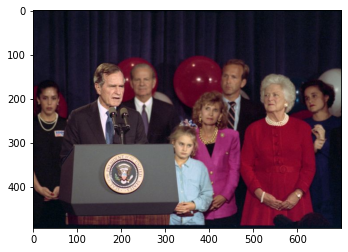

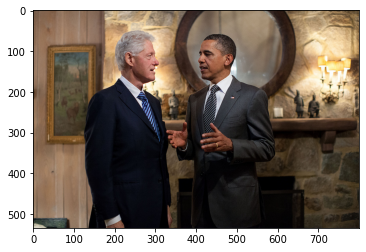

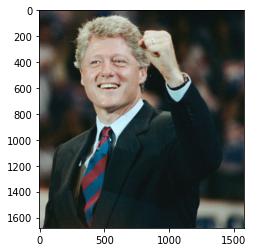

In [37]:
#Searching for info on events
print(response1)
from google_images_search import GoogleImagesSearch
gis = GoogleImagesSearch(config.GCS_DEVELOPER_KEY, config.GCS_CX)
# define search params
_search_params = {
    'q': response1,
    'num': 3,
    'fileType': 'jpg|gif|png',
    'rights': 'cc_publicdomain|cc_attribute|cc_sharealike|cc_noncommercial|cc_nonderived',
    # 'safe': 'active|high|medium|off|safeUndefined', ##
    # 'imgType': 'clipart|face|lineart|stock|photo|animated|imgTypeUndefined', ##
    # 'imgSize': 'large|medium|small|xlarge', ##
    # 'imgDominantColor': 'black|blue|brown|gray|green|orange|pink|purple|red|teal|white|yellow|imgDominantColorUndefined', ##
    # 'imgColorType': 'color|gray|mono|trans|imgColorTypeUndefined' ##
}
gis.search(search_params=_search_params)

#Plot first 3 images
import matplotlib.pyplot as plt
import cv2
import urllib
import numpy as np
%matplotlib inline
for image in gis.results():
    image_url = image.url
    req = urllib.request.urlopen(image_url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1) # 'Load it as it is'
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB )
    plt.imshow(img)
    plt.show()

## Get youtube urls

In [46]:
from youtubesearchpython import VideosSearch
response3 = response3.replace('\n','').replace(' ','')
videosSearch = VideosSearch(response3, limit = 1)
print(videosSearch.result()['result'][0]['title'])
print(videosSearch.result()['result'][0]['link'])

Outkast - Hey Ya! (Official HD Video)
https://www.youtube.com/watch?v=PWgvGjAhvIw


In [45]:
response4 = response4.replace('\n','').replace(' ','')
videosSearch = VideosSearch(response4, limit = 1)
print(videosSearch.result()['result'][0]['title'])
print(videosSearch.result()['result'][0]['link'])

Gorillaz - Feel Good Inc. (Official Video)
https://www.youtube.com/watch?v=HyHNuVaZJ-k


In [47]:
response2 = response2.replace('\n','').replace(' ','')
videosSearch = VideosSearch(response2+' trailer', limit = 1)
print(videosSearch.result()['result'][0]['title'])
print(videosSearch.result()['result'][0]['link'])

Reservoir Dogs (1992) Official Trailer #1 - Quentin Tarantino Movie
https://www.youtube.com/watch?v=vayksn4Y93A
